In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

2023-01-17 19:09:46.513961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["EIN", "NAME","STATUS","SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

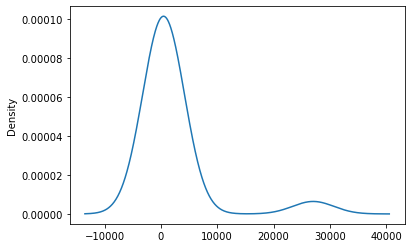

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_apps = list(app_count[app_count < 500].index)

# Replace in dataframe
for app in replace_apps:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

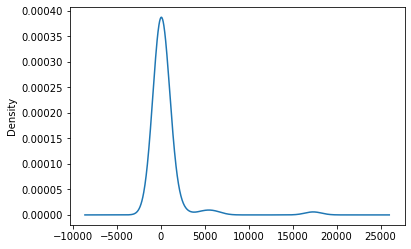

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Remove special considerations
##application_df.SPECIAL_CONSIDERATIONS.value_counts()

In [11]:
##application_df = application_df.loc[application_df.SPECIAL_CONSIDERATIONS == "N"]
##application_df.SPECIAL_CONSIDERATIONS.value_counts()

In [12]:
##application_df = application_df.drop(["SPECIAL_CONSIDERATIONS"], axis=1)
##application_df.head(10)
## special considerations kept as tests proved to be a necessary variable

In [13]:
# Look at ASK_AMT value counts for binning
ask_count = application_df.ASK_AMT.value_counts()
ask_count

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

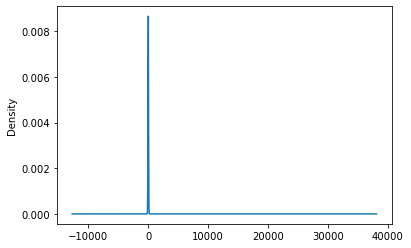

In [14]:
# Visualize the value counts of ASK_AMT
ask_count.plot.density()

In [15]:
# Determine which values to replace if counts are less than ...?
replace_ask = list(ask_count[ask_count < 1000].index)

# Replace in dataframe
for amt in replace_ask:
    if amt <= 49999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5001-49999"))
    elif amt < 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt < 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt < 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("500000-999999"))
    elif amt < 4999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("1M-5M"))
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000             25398
5001-49999        2947
100000-499999     2305
50000-99999       1421
1M-5M              940
500000-999999      651
5M+                637
Name: ASK_AMT, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/crystinadang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/var/folders/nv/fp5fj5n155q18dnd926k3vgm0000gn/T/ipykernel_8472/2023052568.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

/var/folders/nv/fp5fj5n155q18dnd926k3vgm0000gn/T/ipykernel_8472/307776193.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

2023-01-17 19:10:04.111789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3760      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

In [25]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5728 - accuracy: 0.7173
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7271
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7318
Epoch 5/100
774/804 [===========================>..] - ETA: 0s - loss: 0.5476 - accuracy: 0.7309
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5438 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] -

792/804 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.7423
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5260 - accuracy: 0.7426
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7429
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7437
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7436
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7436
Epoch 70/100
791/804 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7431
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7431
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7427
Epoch 72/100
804/804 

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 4.7218 - accuracy: 0.6885 - 374ms/epoch - 1ms/step
Loss: 4.72178840637207, Accuracy: 0.6885131001472473


<AxesSubplot:>

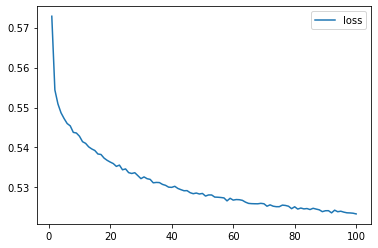

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

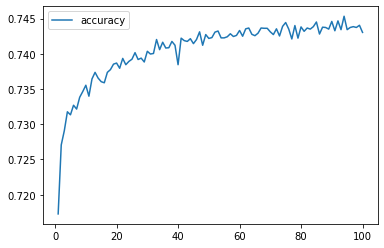

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3760      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,511
Trainable params: 6,511
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5736 - accuracy: 0.7193
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7268
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7303
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7299
Epoch 5/100
793/804 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7316
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7332
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] -

796/804 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7436
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5255 - accuracy: 0.7437
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7441
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7435
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7452
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7432
Epoch 70/100
784/804 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.7445
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7439
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.7430
Epoch 72/100
804/804 

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 4.0079 - accuracy: 0.6971 - 405ms/epoch - 2ms/step
Loss: 4.007936000823975, Accuracy: 0.6971428394317627


<AxesSubplot:>

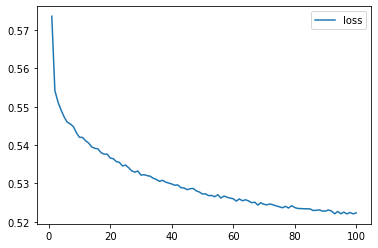

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

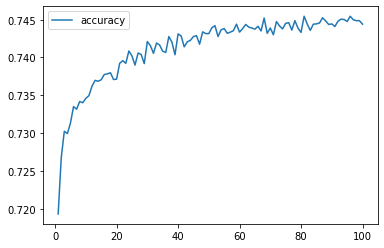

In [34]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3760      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5719 - accuracy: 0.7168
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7258
Epoch 5/100
780/804 [============================>.] - ETA: 0s - loss: 0.5514 - accuracy: 0.7281
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.7279
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7300
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7293
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7303
Epoch 9/100
804/804 [==============================] -

784/804 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7395
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7395
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7393
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7398
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.7387
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.7385
Epoch 70/100
798/804 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7396
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7393
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7401
Epoch 72/100
804/804 

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.3657 - accuracy: 0.5430 - 350ms/epoch - 1ms/step
Loss: 1.3657084703445435, Accuracy: 0.5429737567901611


<AxesSubplot:>

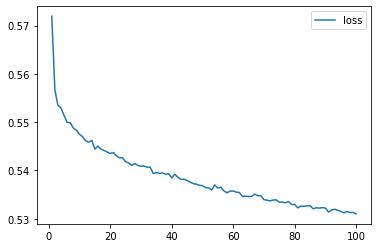

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

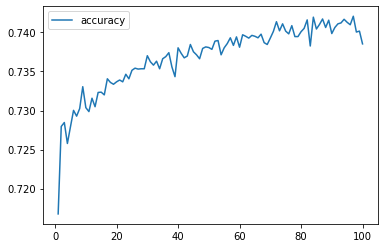

In [40]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                3760      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5837 - accuracy: 0.7148
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.7242
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7275
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7267
Epoch 5/100
774/804 [===========================>..] - ETA: 0s - loss: 0.5531 - accuracy: 0.7271
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7276
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7293
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7300
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7290
Epoch 9/100
804/804 [==============================] -

776/804 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7382
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7381
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7398
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7406
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7406
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7403
Epoch 70/100
772/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7404
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7402
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7402
Epoch 72/100
804/804 

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6894 - accuracy: 0.6911 - 362ms/epoch - 1ms/step
Loss: 0.6894498467445374, Accuracy: 0.6910787224769592


<AxesSubplot:>

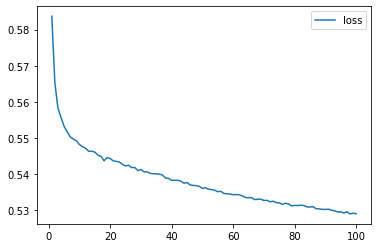

In [45]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

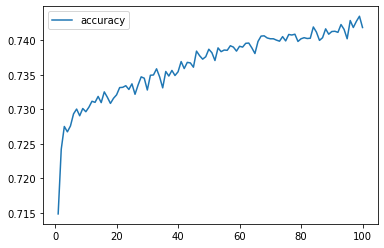

In [46]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 120)               5640      
                                                                 
 dense_14 (Dense)            (None, 80)                9680      
                                                                 
 dense_15 (Dense)            (None, 1)                 81        
                                                                 
Total params: 15,401
Trainable params: 15,401
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5850 - accuracy: 0.7152
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5678 - accuracy: 0.7226
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5600 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5563 - accuracy: 0.7266
Epoch 5/100
783/804 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7259
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7262
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7296
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.7285
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7288
Epoch 9/100
804/804 [==============================] -

768/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7410
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7404
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7395
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5326 - accuracy: 0.7400
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5323 - accuracy: 0.7404
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5321 - accuracy: 0.7422
Epoch 70/100
786/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7420
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7416
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7400
Epoch 72/100
804/804 

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7008 - accuracy: 0.6596 - 600ms/epoch - 2ms/step
Loss: 0.7008204460144043, Accuracy: 0.6595918536186218


<AxesSubplot:>

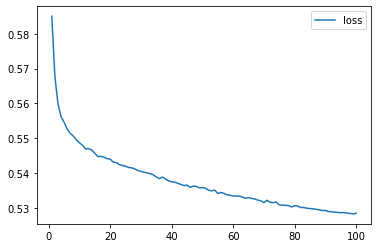

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

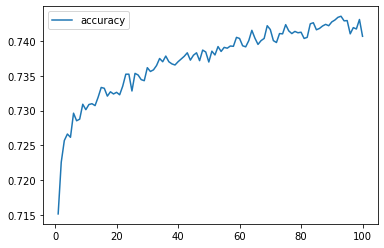

In [52]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 94

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 94)                4418      
                                                                 
 dense_17 (Dense)            (None, 1)                 95        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5906 - accuracy: 0.7098
Epoch 2/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.7183
Epoch 3/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5770 - accuracy: 0.7196
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5745 - accuracy: 0.7212
Epoch 5/150
796/804 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.7220
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.7224
Epoch 6/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.7239
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5632 - accuracy: 0.7253
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7231
Epoch 9/150
804/804 [==============================] -

761/804 [===========================>..] - ETA: 0s - loss: 0.5386 - accuracy: 0.7366
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5408 - accuracy: 0.7351
Epoch 66/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7364
Epoch 67/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5405 - accuracy: 0.7352
Epoch 68/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7360
Epoch 69/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7364
Epoch 70/150
781/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7349
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7347
Epoch 71/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7360
Epoch 72/150
804/804 

804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7392
Epoch 128/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7388
Epoch 129/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7392
Epoch 130/150
767/804 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7386
Epoch 130: saving model to checkpoints/weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7390
Epoch 131/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7395
Epoch 132/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7389
Epoch 133/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7376
Epoch 134/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.7397
Epoch 135/150
789/804 [==========================

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8716 - accuracy: 0.5756 - 349ms/epoch - 1ms/step
Loss: 0.8715887665748596, Accuracy: 0.5756268501281738


<AxesSubplot:>

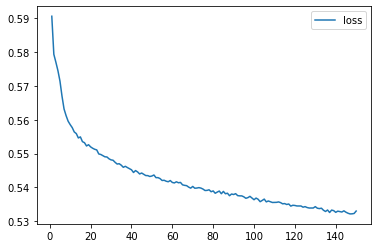

In [57]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

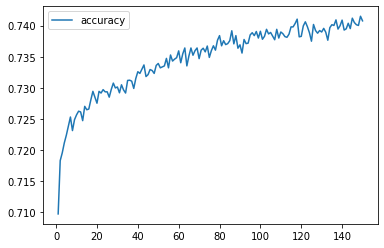

In [58]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 94

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 94)                4418      
                                                                 
 dense_19 (Dense)            (None, 1)                 95        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5817 - accuracy: 0.7121
Epoch 2/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7275
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7279
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7289
Epoch 5/150
766/804 [===========================>..] - ETA: 0s - loss: 0.5485 - accuracy: 0.7314
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7307
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7296
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5461 - accuracy: 0.7320
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7323
Epoch 9/150
804/804 [==============================] -

771/804 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7423
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7425
Epoch 66/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7408
Epoch 67/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7417
Epoch 68/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7400
Epoch 69/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7413
Epoch 70/150
788/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7410
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7414
Epoch 71/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7411
Epoch 72/150
804/804 

804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7432
Epoch 128/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7433
Epoch 129/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7431
Epoch 130/150
802/804 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.7422
Epoch 130: saving model to checkpoints/weights.130.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7423
Epoch 131/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7449
Epoch 132/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7444
Epoch 133/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7440
Epoch 134/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7441
Epoch 135/150
773/804 [==========================

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 10.1401 - accuracy: 0.4681 - 386ms/epoch - 1ms/step
Loss: 10.140137672424316, Accuracy: 0.4681049585342407


<AxesSubplot:>

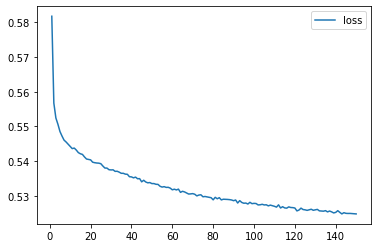

In [63]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

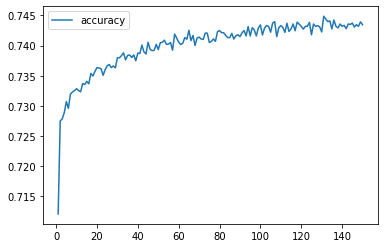

In [64]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [65]:
# Model defined by best hyperparameters test after 500 tests in 4 hours
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 66
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 66
hidden_nodes_layer4 = 61


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 66)                3102      
                                                                 
 dense_21 (Dense)            (None, 16)                1072      
                                                                 
 dense_22 (Dense)            (None, 66)                1122      
                                                                 
 dense_23 (Dense)            (None, 61)                4087      
                                                                 
 dense_24 (Dense)            (None, 1)                 62        
                                                                 
Total params: 9,445
Trainable params: 9,445
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=34, callbacks=[cp_callback])

Epoch 1/34
804/804 [==============================] - 2s 1ms/step - loss: 0.5716 - accuracy: 0.7161
Epoch 2/34
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7289
Epoch 3/34
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7332
Epoch 4/34
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7301
Epoch 5/34
769/804 [===========================>..] - ETA: 0s - loss: 0.5481 - accuracy: 0.7314
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7325
Epoch 6/34
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7336
Epoch 7/34
804/804 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7333
Epoch 8/34
804/804 [==============================] - 1s 2ms/step - loss: 0.5445 - accuracy: 0.7340
Epoch 9/34
804/804 [==============================] - 1s 2ms/s

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.4795 - accuracy: 0.6848 - 294ms/epoch - 1ms/step
Loss: 2.4794583320617676, Accuracy: 0.6847813129425049


<AxesSubplot:>

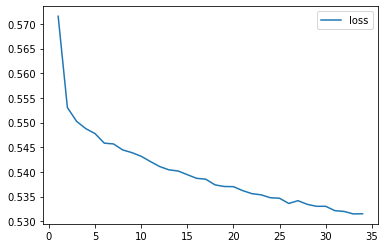

In [71]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

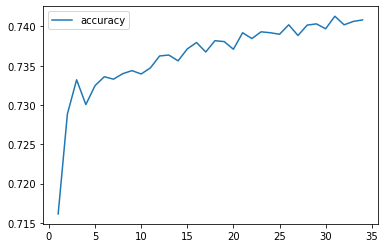

In [72]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [73]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [67]:
# Import the model to a new object
## nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')